In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize

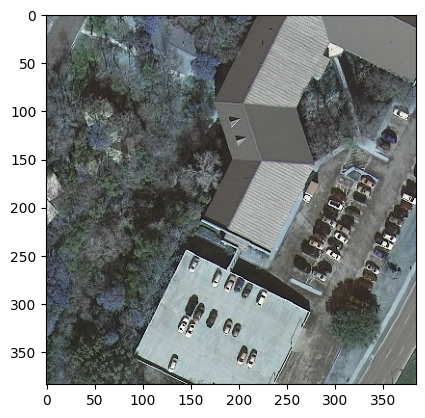

In [71]:
test_image = cv2.imread('./AerialImageDataset/train_384x384/images/austin20_1_6.jpg')
test_image = resize(test_image,(384,384,3))
plt.imshow(test_image, cmap='gray')
plt.show()

In [77]:
model_path = './models/model2.keras'
model = tf.keras.models.load_model(model_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


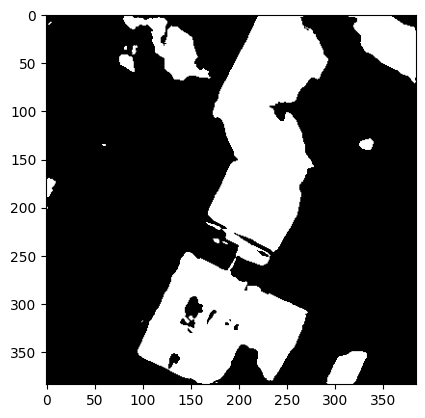

In [78]:
mask = model.predict(np.expand_dims(test_image, 0))
mask= mask.reshape(384,384)*255
ret, pred = cv2.threshold(mask, 125, 255, cv2.THRESH_BINARY)
plt.imshow(pred, cmap='gray')
    

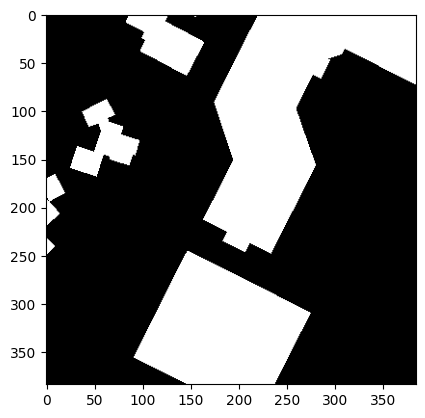

In [74]:
from skimage.color import rgb2gray
gt = cv2.imread('./AerialImageDataset/train_384x384/gt/austin20_1_6.png')
gt = resize(gt,(384,384,3))

gt = rgb2gray(gt)
plt.imshow(gt, cmap='gray')
plt.show()

In [75]:
intersection = np.logical_and(gt, pred)
union = np.logical_or(gt, pred)
iou_score = np.sum(intersection) / np.sum(union)

In [76]:
iou_score

np.float64(0.7816872581125335)

In [46]:
# Load the binary mask image
binary_mask = pred

# Check if the binary mask image is loaded correctly
if binary_mask is None:
    raise ValueError("Binary mask image not found at the specified path.")

# Convert binary mask to CV_8UC1 format
binary_mask = (binary_mask * 255).astype(np.uint8)

# Find contours of the white pixels
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Load the original image (assuming the same size as the binary mask)
original_image_path ='./AerialImageDataset/train_384x384/images/austin9_9_7.jpg'
original_image = cv2.imread(original_image_path)

# Check if the original image is loaded correctly
if original_image is None:
    raise ValueError("Original image not found at the specified path.") 

# Ensure the original image is in the correct format for display
if len(original_image.shape) == 2:
    original_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)

# Draw polygons around the detected contours and calculate areas
for contour in contours:
    # Approximate the contour to reduce the number of points
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    cv2.drawContours(original_image, [approx], -1, (0, 255, 0), 2)
    
    # Calculate the area in pixel units
    pixel_area = cv2.contourArea(contour)

    
    # Print or store the area values as needed
    print(f"Pixel Area: {pixel_area}")

# Save the image with traced rooftops
output_path = '_output_image.png'
cv2.imwrite(output_path, original_image)

# Optionally, display the image with traced rooftops
# cv2.imshow('Detected Rooftops', original_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Pixel Area: 13.5
Pixel Area: 4465.0
Pixel Area: 21.5
Pixel Area: 7083.5
Pixel Area: 0.0
Pixel Area: 1748.0
Pixel Area: 9262.5
Pixel Area: 655.0
Pixel Area: 275.0
Pixel Area: 27.5
Pixel Area: 9178.5
Pixel Area: 5097.0
Pixel Area: 924.5
Pixel Area: 6996.0
Pixel Area: 10419.5


True

In [47]:
image_path = 'AerialImageDataset/train_384x384/images/austin9_9_3.jpg'

In [48]:
draw_bounding_boxes(image_path=image_path, output_path='./')

NameError: name 'draw_bounding_boxes' is not defined